In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(X_train, Y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train, x_test = X_train/255, x_test/255

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# Data is in 2D
# Conv expects height x weight x color
import numpy as np

X_train = np.expand_dims(X_train, -1)
x_test = np.expand_dims(x_test, -1)

X_train.shape

(60000, 28, 28, 1)

In [ ]:
# number of classes

K = len(set(Y_train))
K

10

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout
from keras.activations import relu, softmax
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam
from keras.metrics import Accuracy

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), strides=2, activation=relu, input_shape=X_train[0].shape))
model.add(Conv2D(64, (3, 3), strides=2, activation=relu))
model.add(Conv2D(128, (3, 3), strides=2, activation=relu))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(300, activation=relu))
model.add(Dropout(0.2))
model.add(Dense(K, activation=softmax))

In [ ]:
model.compile(
    optimizer=Adam(0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
r = model.fit(
    X_train,
    Y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.5289 - accuracy: 0.8029 - val_loss: 0.4162 - val_accuracy: 0.8472
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3668 - accuracy: 0.8625 - val_loss: 0.3656 - val_accuracy: 0.8631
Epoch 3/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3148 - accuracy: 0.8804 - val_loss: 0.3208 - val_accuracy: 0.8805
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2840 - accuracy: 0.8928 - val_loss: 0.3144 - val_accuracy: 0.8815
Epoch 5/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2555 - accuracy: 0.9033 - val_loss: 0.2994 - val_accuracy: 0.8915


In [ ]:
import matplotlib.pyplot as plt

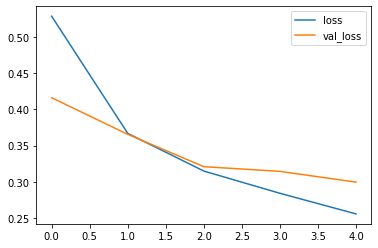

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

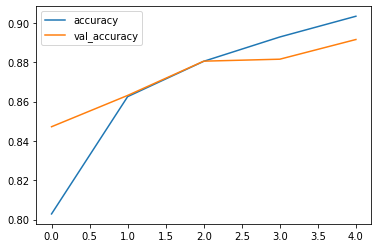

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()